In [1]:
from ipynb.fs.full.github_all_functions_for_Mij_and_Delta_f import *

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)
# get_ipython().run_line_magic('matplotlib', 'inline')
mpl.rcParams['figure.dpi']= 190
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['text.usetex'] = True
fontsize = 10
import matplotlib.lines as mlines
import seaborn as sns
ms = mp 

## Figure 1 in paper (original, arxiv v1)

True
True
True


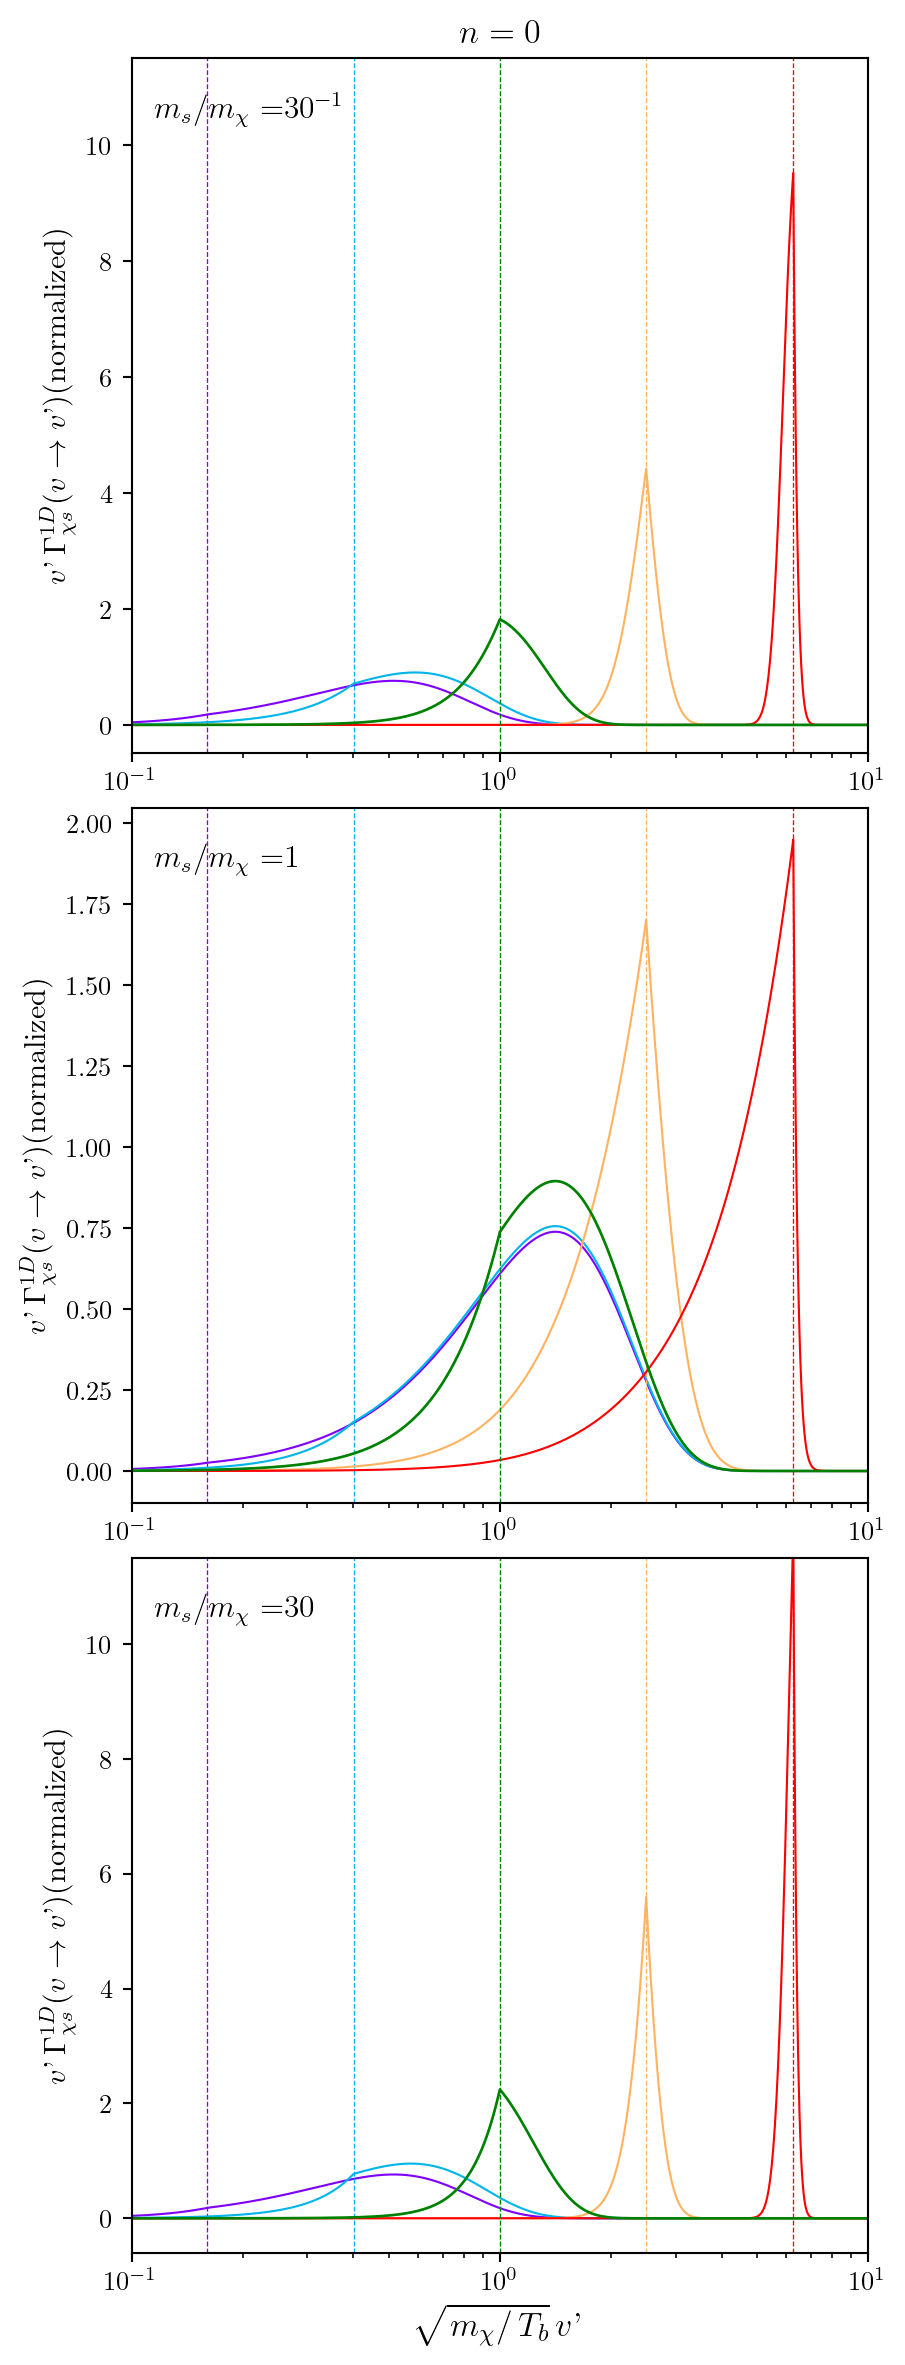

In [ ]:
mchi_ms_arr = np.array([10, 1, 1/10])
vchi_vsth_arr = 1/np.sqrt(mchi_ms_arr) # sqrt(Tchi/Ts)/sqrt(mchi/ms) = vchith/vsth = 1/sqrt(mchi/ms) at decoupling
uchi_usth_arr = vchi_vsth_arr #ratio between typical chi and s velocities at decoupling
u0_arr = uchi_usth_arr*np.sqrt(mchi_ms_arr) # = [1, 1, 1]
u_samples = np.array([1/2.5**2,1/2.5,1,2.5,2.5**2])
u0 = 1

n = 0
ufac, mfac = 100, 10
dlnu = 5e-3
umin, umax = 1e-4, 20
nu = int((np.log(umax/umin))/dlnu) + 1
u_arr = umin * np.exp( dlnu * np.arange(0,nu) )
du_arr = u_arr*dlnu

nmchi, nu0 = len(mchi_ms_arr), len(u0_arr)
n0_Gamma_store = np.empty([nmchi,nu,nu])
lim, d = int(250), 100
u0_ind = np.argmin(abs(u0-u_arr))
kmin, kmax = max(0, u0_ind - lim), min(nu-1, u0_ind + lim)

ls = [':','--','-']
signs0 = [r'$30^{-1}$', r'$1$', r'$30$'] 
labels = [r'($\mathbf{a}$)', r'($\mathbf{b}$)', r'($\mathbf{c}$)' ]
fontsize = 13
fig, ax = plt.subplots(3,1, figsize = [5,5*3])

name = 'rainbow'
cmap = plt.get_cmap(name)

ms = mp #eV
for j,mchi_ms,u0 in zip(range(nmchi),mchi_ms_arr[:],u0_arr):
    axj = ax[j]

    mchi = mchi_ms * ms
    gc.collect()
    Mij, Gamma = calculate_and_store_Mij(mchi, ms, n
                               , umin, umax
                               , nu, dlnu, u_arr
                               , save_flag=False)
    print(np.all(np.isfinite(Gamma)))
    if np.any(Mij) == None:
        print("Mij calculation failed::: breaking out of loop")
        break_loop = True
        break
    gc.collect()

    clrs = iter(cmap(np.linspace(0,1,int((kmax-kmin)/d))))
    for k in range(len(u_samples)):#kmin,kmax,d):
        ind = np.argmin(abs(u_samples[k]-u_arr))
        this_Gamma = Gamma[ind]
        this_norm = np.sum(this_Gamma*du_arr)
        clr = tuple(next(clrs))
        axj.plot(u_arr, (this_Gamma)*u_arr/this_norm,c=clr,
                           lw= 0.8)
        axj.axvline(x = u_arr[ind], ls = '--', lw = .5, 
                       c = clr)

    axj.axvline(x = u0, ls = '--', lw = .5,
                       c = 'g')
    axj.plot(u_arr, (Gamma[u0_ind])*u_arr/np.sum(Gamma[u0_ind]*du_arr), c='g',
                           lw= 1)
        
    axj.set_xscale('log')
    axj.set_ylabel('$v$\'' + r'$\,\Gamma_{\chi s}^{1D}(v \rightarrow v$' + '\'' + r'$)$' + '(normalized)',fontsize=fontsize-1.5)


    axj.text(0.03, 0.95, r' $m_s/m_\chi = $'+signs0[j] #%(ms/mchi)
             , transform=axj.transAxes , fontsize=fontsize-1,va='top', ha = 'left')

    axj.set_xlim(0.1,10)
    if j == 2:
        axj.set_ylim(top = 11.5)

ax[0].set_title(r'$n = %i$'%n, fontsize = fontsize)
ax[-1].set_xlabel(r'$\sqrt{\left.m_\chi\right/T_b}\,v$' + '\'',fontsize=fontsize)
plt.subplots_adjust(hspace = 0.08)
# filepath = '/Users/suroor/Documents/Graduate School/DM-baryon scattering/spring2020/paper_draft_figures/'
# filename = 'vfGamma_for_3mchims_values_n=0_mchims=3e1_1e0_3e-2'
# plt.savefig(filepath+filename+'.pdf',bbox_inches='tight')
plt.show()

## revised (colorblind-friendly) Figure 1

True
True
True


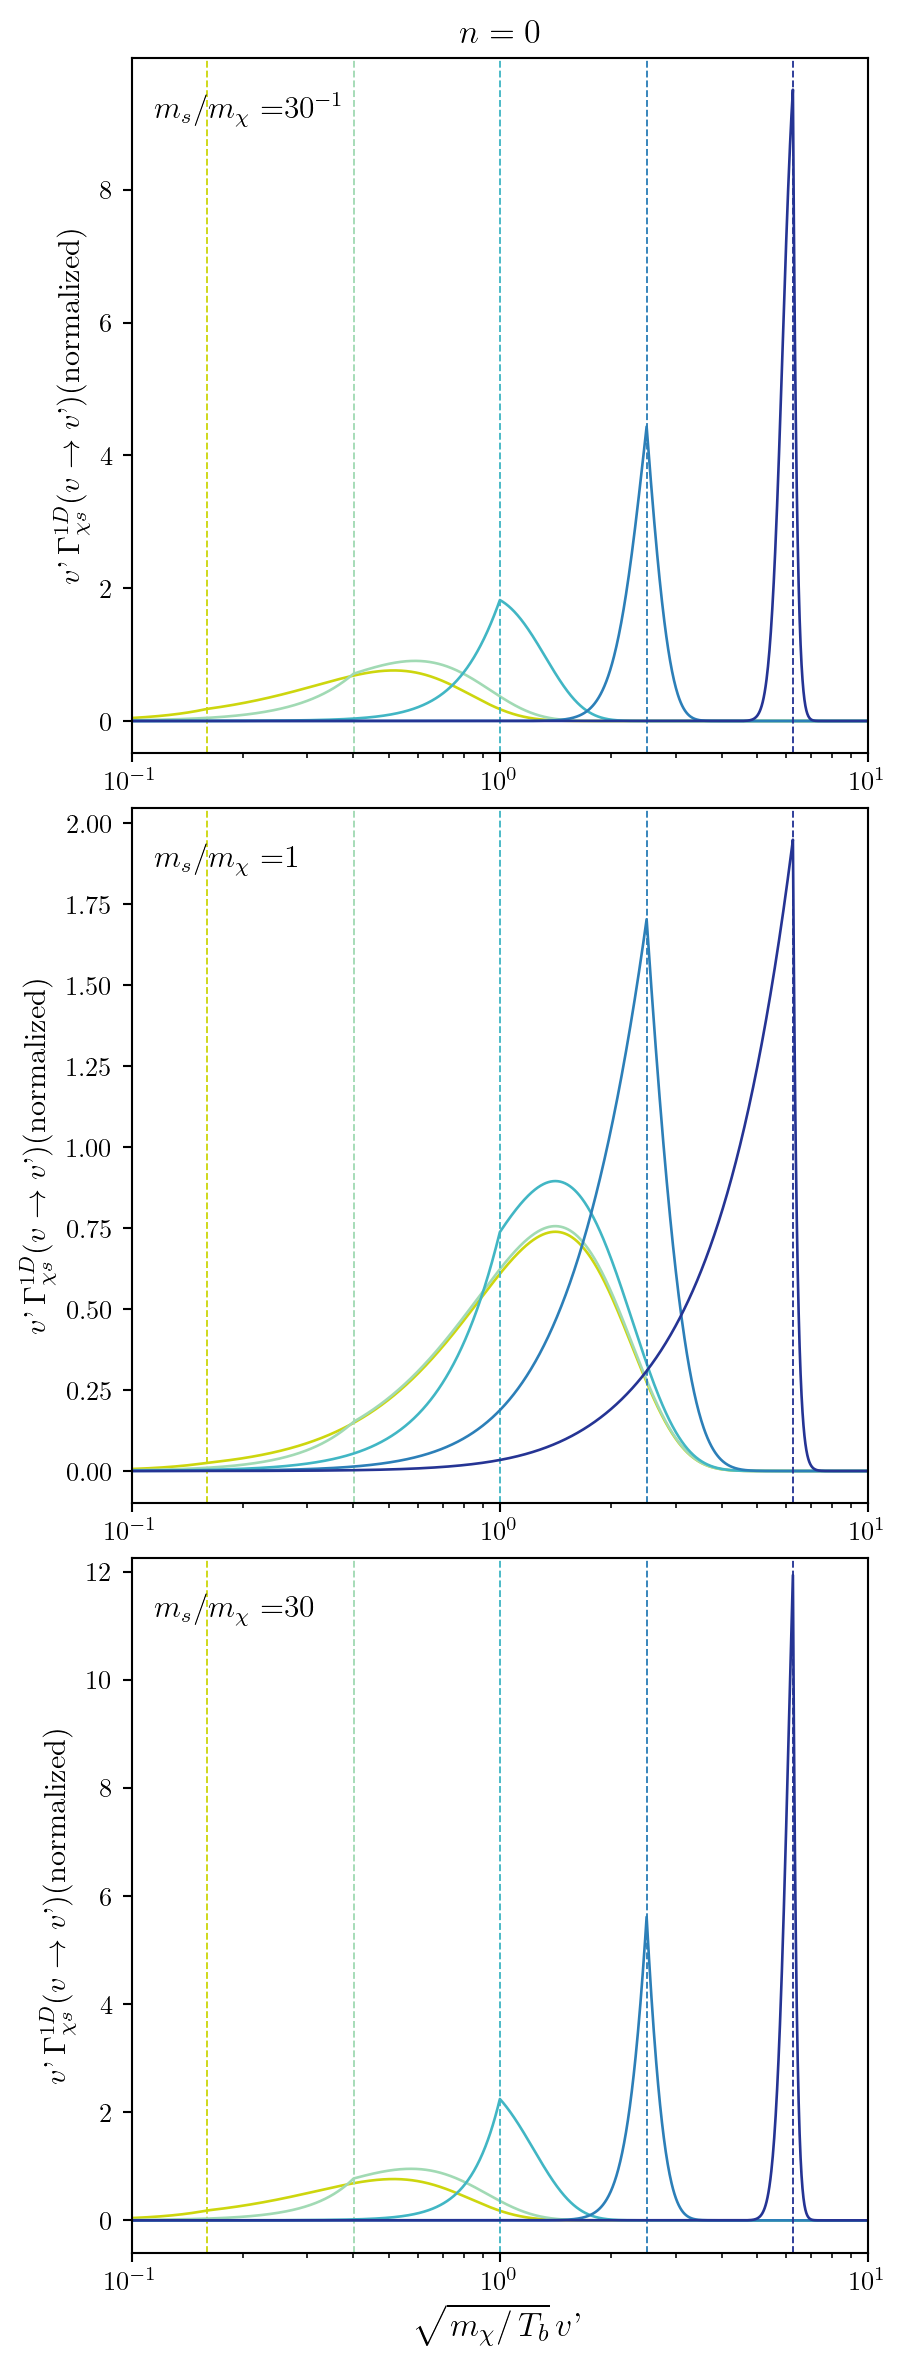

In [20]:
#clean copy for fig 1
mchi_ms_arr = np.array([30, 1, 1/30])#np.array([(0.1)**2, 1**2, 10**2]) #mchi/ms = mu samples ## 
# vchi_vsth_arr = 1/np.sqrt(mchi_ms_arr) #np.array([10, 1, 0.1]) # sqrt(Tchi/Ts)/sqrt(mchi/ms) = vchith/vsth = 1/sqrt(mchi/ms) at decoupling
# uchi_usth_arr = vchi_vsth_arr #ratio between typical chi and s velocities at decoupling
# u0_arr = uchi_usth_arr*np.sqrt(mchi_ms_arr) # = [1, 1, 1]
u_samples = np.array([1/2.5**2,1/2.5,1,2.5,2.5**2])
u0 = 1
ms_mchi_arr = 1/mchi_ms_arr

n = 0
ufac, mfac = 100, 10
dlnu = 3e-3
umin, umax = 1e-4, 20
nu = int((np.log(umax/umin))/dlnu) + 1
u_arr = umin * np.exp( dlnu * np.arange(0,nu) )
du_arr = u_arr*dlnu

nmchi = len(mchi_ms_arr)
n0_Gamma_store = np.empty([nmchi,nu,nu])
u0_ind = np.argmin(abs(u0-u_arr))

signs0 = [r'$30^{-1}$', r'$1$', r'$30$']
fontsize = 13

clrs = [(206/256,215/256,14/256), '#a1dab4', '#41b6c4', '#2c7fb8', '#253494'] #['#feebe2','#fbb4b9','#f768a1','#c51b8a','#7a0177'] 
#ffffcc
#a1dab4
#41b6c4
#2c7fb8
#253494
# cmap = np.flip(np.array(sns.color_palette("colorblind", as_cmap=True)))
fig, ax = plt.subplots(3,1, figsize = [5,5*3])

ms = mp #eV
for j,mchi_ms in zip(range(nmchi)[:],mchi_ms_arr):
    axj = ax[j]
    ms_mchi = 1/mchi_ms
    
    gc.collect()
    Mij, Gamma = get_Mij_and_Gamma_ij(n, ms_mchi, u_arr, dlnu) 
    print(np.all(np.isfinite(Gamma)))
    if np.any(Mij) == None:
        print("Mij calculation failed::: breaking out of loop")
        break_loop = True
        break
    gc.collect()

#     clrs = iter(clrs)
    for k in range(len(u_samples)):
        ind = np.argmin(abs(u_samples[k]-u_arr))
        this_Gamma = Gamma[ind]
        this_norm = np.sum(this_Gamma*du_arr)
        axj.plot(u_arr, (this_Gamma)*u_arr/this_norm, c=clrs[k],
                           lw= 1)
        axj.axvline(x = u_arr[ind], ls = '--', lw = .7, 
                       c = clrs[k])     
    axj.set_xscale('log')
    axj.set_ylabel('$v$\'' + r'$\,\Gamma_{\chi s}^{1D}(v \rightarrow v$' + '\'' + r'$)$' + '(normalized)',fontsize=fontsize-1.5)
    axj.text(0.03, 0.95, r' $m_s/m_\chi = $'+signs0[j] 
             , transform=axj.transAxes , fontsize=fontsize-1,va='top', ha = 'left')
    axj.set_xlim(0.1,10)
    if  j == 2:
        axj.set_ylim(top = 12.25)

ax[0].set_title(r'$n = %i$'%n, fontsize = fontsize)
ax[-1].set_xlabel(r'$\sqrt{\left.m_\chi\right/T_b}\,v$' + '\'',fontsize=fontsize)
plt.subplots_adjust(hspace = 0.08)
"""save figure:"""
# filepath = ''
# filename = 'colorblind_vfGamma_for_3mchims_values_n=0_mchims=3e1_1e0_3e-2'
# plt.savefig(filepath+filename+'.pdf',bbox_inches='tight')
plt.show()

## Figure 1 in paper (original, arxiv v1)

True
True
True


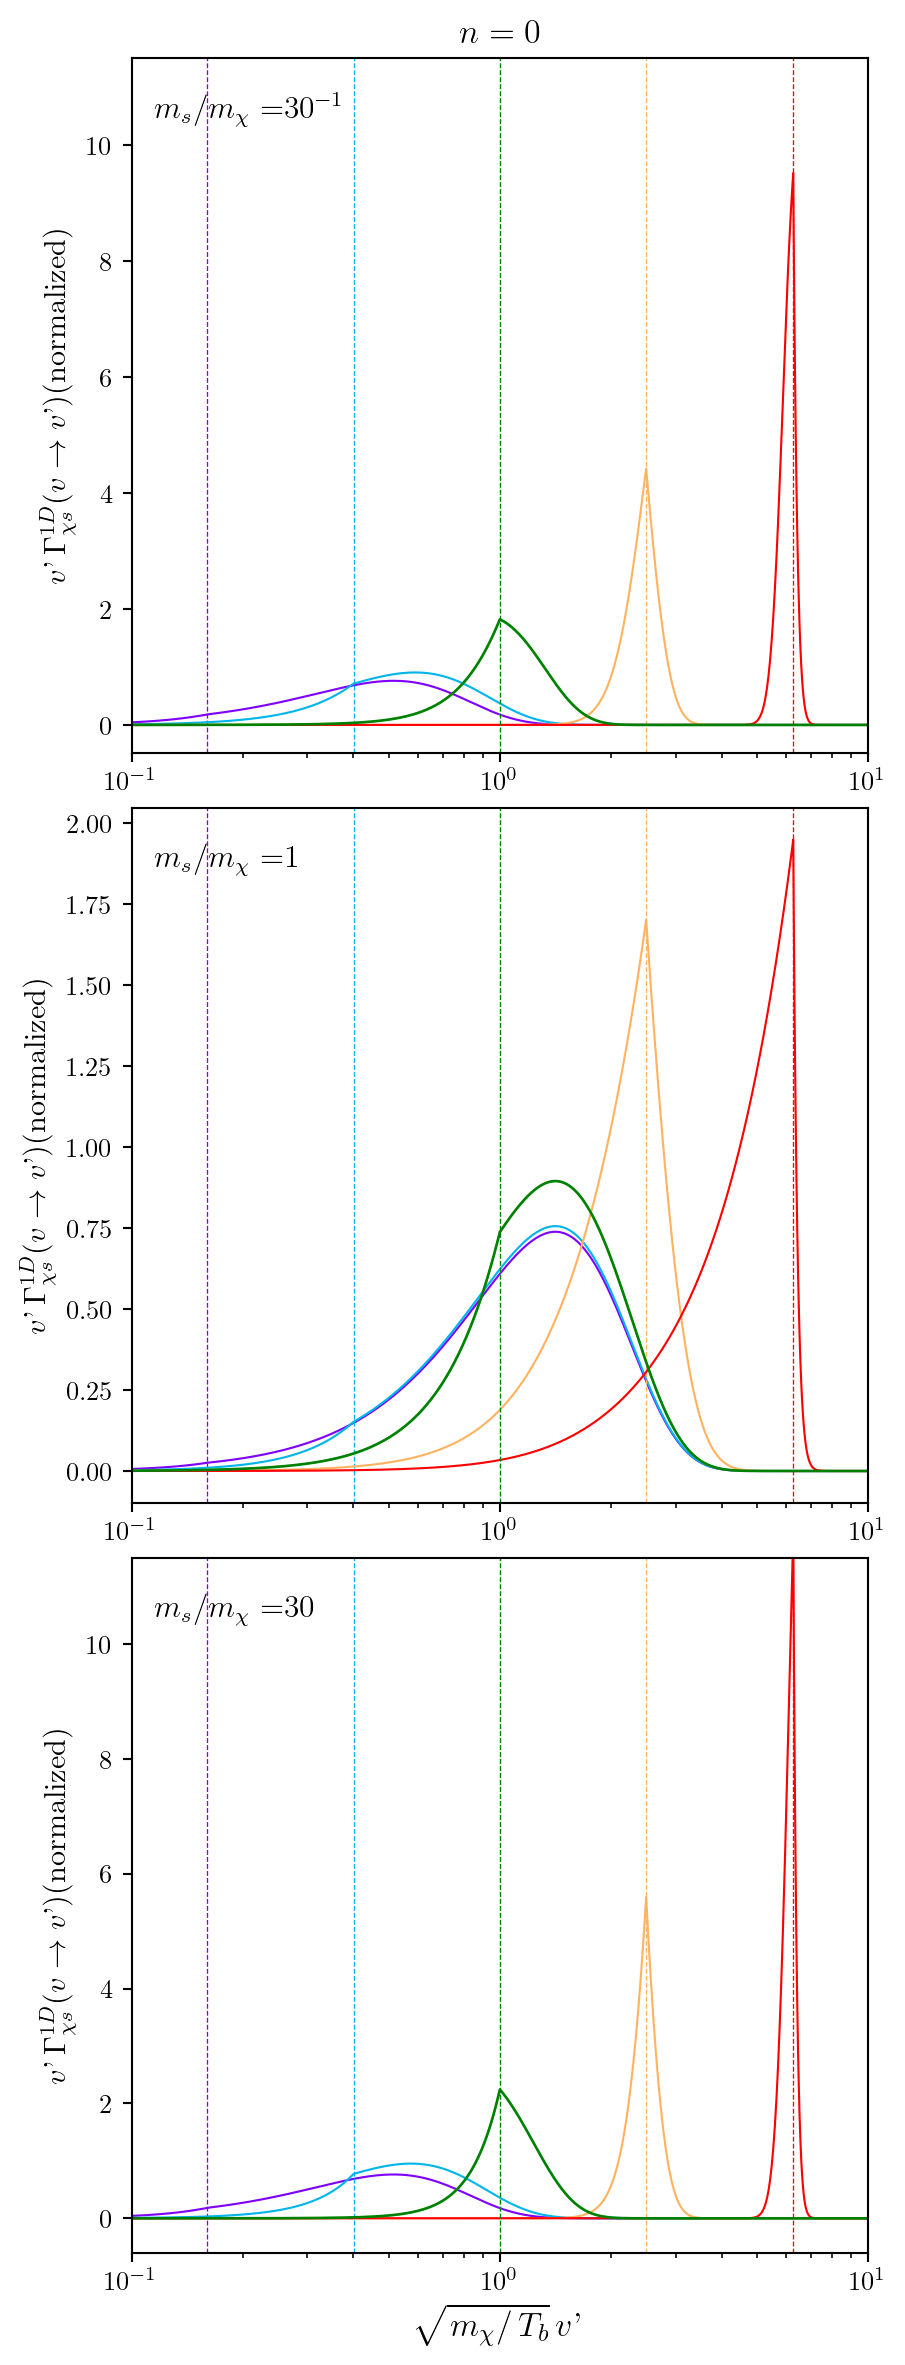

In [ ]:
mchi_ms_arr = np.array([10, 1, 1/10])
vchi_vsth_arr = 1/np.sqrt(mchi_ms_arr) # sqrt(Tchi/Ts)/sqrt(mchi/ms) = vchith/vsth = 1/sqrt(mchi/ms) at decoupling
uchi_usth_arr = vchi_vsth_arr #ratio between typical chi and s velocities at decoupling
u0_arr = uchi_usth_arr*np.sqrt(mchi_ms_arr) # = [1, 1, 1]
u_samples = np.array([1/2.5**2,1/2.5,1,2.5,2.5**2])
u0 = 1

n = 0
ufac, mfac = 100, 10
dlnu = 5e-3
umin, umax = 1e-4, 20
nu = int((np.log(umax/umin))/dlnu) + 1
u_arr = umin * np.exp( dlnu * np.arange(0,nu) )
du_arr = u_arr*dlnu

nmchi, nu0 = len(mchi_ms_arr), len(u0_arr)
n0_Gamma_store = np.empty([nmchi,nu,nu])
lim, d = int(250), 100
u0_ind = np.argmin(abs(u0-u_arr))
kmin, kmax = max(0, u0_ind - lim), min(nu-1, u0_ind + lim)

ls = [':','--','-']
signs0 = [r'$30^{-1}$', r'$1$', r'$30$'] 
labels = [r'($\mathbf{a}$)', r'($\mathbf{b}$)', r'($\mathbf{c}$)' ]
fontsize = 13
fig, ax = plt.subplots(3,1, figsize = [5,5*3])

name = 'rainbow'
cmap = plt.get_cmap(name)

ms = mp #eV
for j,mchi_ms,u0 in zip(range(nmchi),mchi_ms_arr[:],u0_arr):
    axj = ax[j]

    mchi = mchi_ms * ms
    gc.collect()
    Mij, Gamma = calculate_and_store_Mij(mchi, ms, n
                               , umin, umax
                               , nu, dlnu, u_arr
                               , save_flag=False)
    print(np.all(np.isfinite(Gamma)))
    if np.any(Mij) == None:
        print("Mij calculation failed::: breaking out of loop")
        break_loop = True
        break
    gc.collect()

    clrs = iter(cmap(np.linspace(0,1,int((kmax-kmin)/d))))
    for k in range(len(u_samples)):#kmin,kmax,d):
        ind = np.argmin(abs(u_samples[k]-u_arr))
        this_Gamma = Gamma[ind]
        this_norm = np.sum(this_Gamma*du_arr)
        clr = tuple(next(clrs))
        axj.plot(u_arr, (this_Gamma)*u_arr/this_norm,c=clr,
                           lw= 0.8)
        axj.axvline(x = u_arr[ind], ls = '--', lw = .5, 
                       c = clr)

    axj.axvline(x = u0, ls = '--', lw = .5,
                       c = 'g')
    axj.plot(u_arr, (Gamma[u0_ind])*u_arr/np.sum(Gamma[u0_ind]*du_arr), c='g',
                           lw= 1)
        
    axj.set_xscale('log')
    axj.set_ylabel('$v$\'' + r'$\,\Gamma_{\chi s}^{1D}(v \rightarrow v$' + '\'' + r'$)$' + '(normalized)',fontsize=fontsize-1.5)


    axj.text(0.03, 0.95, r' $m_s/m_\chi = $'+signs0[j] #%(ms/mchi)
             , transform=axj.transAxes , fontsize=fontsize-1,va='top', ha = 'left')

    axj.set_xlim(0.1,10)
    if j == 2:
        axj.set_ylim(top = 11.5)

ax[0].set_title(r'$n = %i$'%n, fontsize = fontsize)
ax[-1].set_xlabel(r'$\sqrt{\left.m_\chi\right/T_b}\,v$' + '\'',fontsize=fontsize)
plt.subplots_adjust(hspace = 0.08)
"""save figure:"""
# filepath = ''
# filename = 'vfGamma_for_3mchims_values_n=0_mchims=3e1_1e0_3e-2'
# plt.savefig(filepath+filename+'.pdf',bbox_inches='tight')
plt.show()